TODOS:
1. Standartasation of hot encodeds,- I dont think we need it but maybe very at the end we can do it.
2. Generalisation error to linear regression -Done 

### Change the directory to the repository folder in your computer depends on wherever it is.

In [6]:
#cd /home/mehmet/Desktop/DTU_Fall_018/Introduction_machine_learning/project2
cd ~/Desktop/ML_project2

/Users/BotezatuCristian/Desktop/ML_project2


In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

# PCA

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


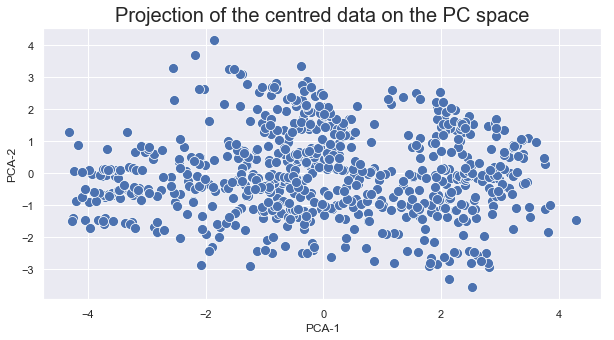

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
df = pd.read_excel('DataSet.xlsx')
df[-5:]

import matplotlib.pyplot as plt
from scipy.linalg import svd
import numpy as np
from datetime import date

X = df.as_matrix(columns=df.columns[df.columns!='Date'])
N = len(df.columns) -1

std = np.std(X, axis=0)
std = np.expand_dims(std,axis=0)

X = X/std
# Subtract mean value from data

Y = X - np.ones((N))*X.mean(axis=0)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)
V = V.T

Z = Y @ V[:,:2]


data = pd.DataFrame({'PCA-1':Z[:,0],'PCA-2':Z[:,1]})  

ax = sns.scatterplot(x="PCA-1", y="PCA-2",
                      s=100, 
                     data=data)
ax.set_title('Projection of the centred data on the PC space', fontsize = 20)
sns.set(rc={'figure.figsize':(1,1)})
ax = ax.get_figure()
ax.savefig('projection_data.png')

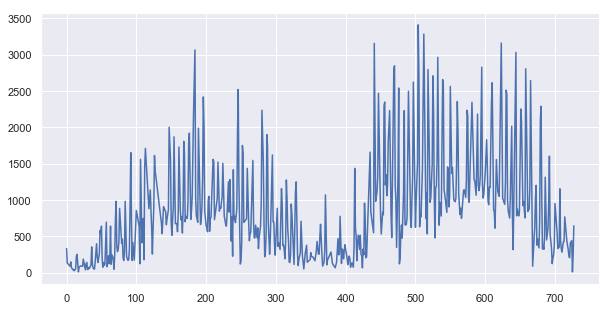

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import pandas as pd
import numpy as np
df = pd.read_excel('DataSet.xlsx')

df = df[(df.temp<=1) & (df.temp>0) & (df.atemp<=1) & (df.atemp>=0) & (df.hum<=1) & (df.hum>=0) & (df.windspeed <=1) ]
orig_y = df['new']
# df['new'] = np.log(((df['new'] - df['new'].mean()) / df['new'].std()).abs()).abs()
# np.log(((df['new'] - df['new'].mean()) / df['new'].std()).abs()).abs().hist()
# df.head()
plt.plot(df['new'])

# Linear Model without generalisation

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
sub_df = df[[ 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
cols = [ 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for each in cols:
    dummies = pd.get_dummies(sub_df[each], prefix=each)
    sub_df = sub_df.drop(each, axis = 1)
    sub_df = pd.concat([ dummies, sub_df], axis=1)
    
sub_df = pd.concat([ df[['hum']], sub_df], axis=1)
sub_df = pd.concat([ df[['temp']], sub_df], axis=1)
sub_df = pd.concat([ df[['atemp']], sub_df], axis=1)
sub_df = pd.concat([ df[['windspeed']], sub_df], axis=1)


X = sub_df.as_matrix()
y = np.asarray(df['new'])



reg = LinearRegression().fit(X , y)
reg.coef_



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


array([-2.27816614e+02,  1.47685428e+03,  8.25725226e+01,  5.48694473e+01,
        2.46178081e+16,  2.46178081e+16,  2.46178081e+16,  3.57362294e+15,
        8.06950224e+15,  5.55166510e+15,  1.05578580e+15,  1.05578580e+15,
        1.05578580e+15,  1.05578580e+15,  1.05578580e+15,  5.55166510e+15,
        2.91034198e+15,  7.40622128e+15,  4.53503123e+14,  4.53503123e+14,
        4.53503123e+14,  4.53503123e+14,  4.53503123e+14,  4.53503123e+14,
        4.53503123e+14,  4.53503123e+14,  4.53503123e+14,  4.53503123e+14,
        4.53503123e+14,  4.53503123e+14, -2.16739803e+15, -2.16739803e+15,
       -2.16739803e+15, -2.16739803e+15])

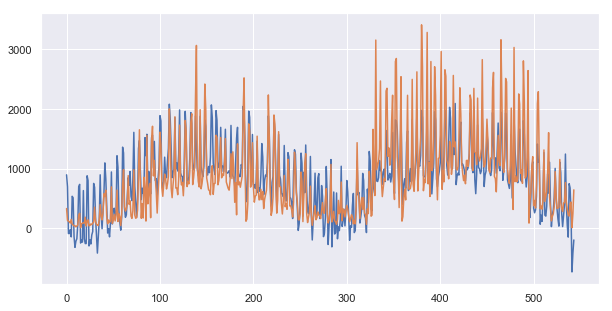

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
from matplotlib.pyplot import  plot, legend
predicted = plt.plot(range(len(X)), reg.predict(X), label = 'predicted')
original = plt.plot(range(len(X)), y, label = 'original')


plt.savefig('predicted_and_original.png')


# Linear Model with Generalisation

In [12]:
from sklearn import linear_model

def get_ridge_lm(alpha = 0.1):
    reg = linear_model.Ridge (alpha = alpha).fit(X[:200], y[:200])
    return reg



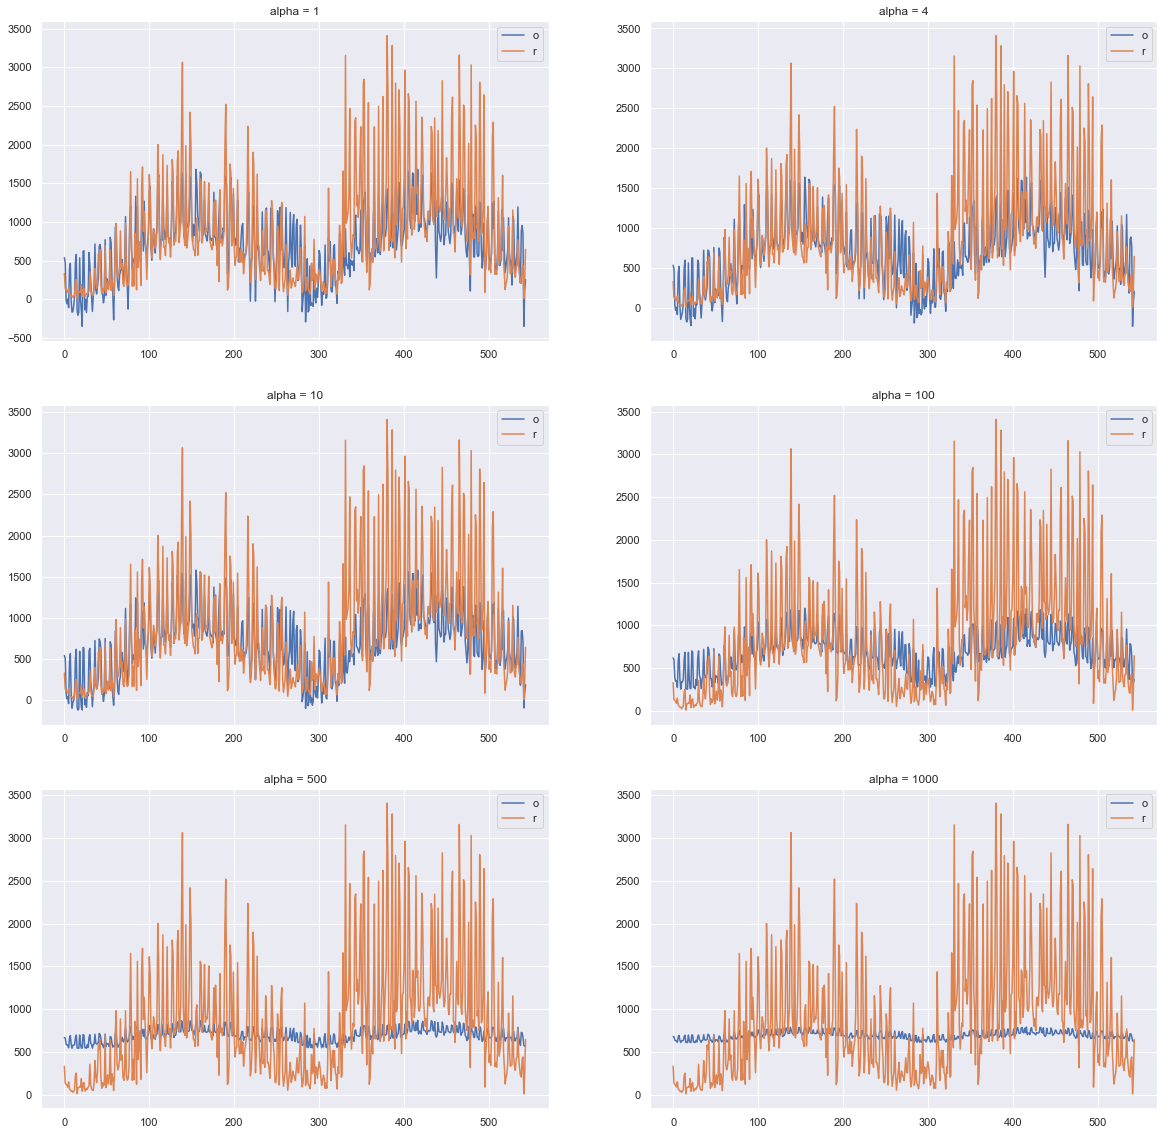

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
from matplotlib.pyplot import  plot, legend


alphas = [1, 4, 10, 100, 500, 1000]
for i in range(6):
    plt.subplot(3, 2, i+1)
    predicted = plot(get_ridge_lm(alpha = int(alphas[i])).predict(X), label = 'predicted')
    legend('predicted')
    original = plot(y, label = 'original')
    legend('original')
    title = 'alpha = ' + str(alphas[i])
    plt.title(title)

plt.savefig('predicted_and_original.png')


In [14]:
#cd /home/mehmet/Desktop/DTU_Fall_018/Introduction_machine_learning/02450Toolbox_Python/Tools
cd ~/Desktop/ML_project2

/Users/BotezatuCristian/Desktop/ML_project2


# 2.Forward selection linear regression

Cross validation fold 1/20
Features no: 11

Cross validation fold 2/20
Features no: 20

Cross validation fold 3/20
Features no: 11

Cross validation fold 4/20
Features no: 15

Cross validation fold 5/20
Features no: 10

Cross validation fold 6/20
Features no: 19

Cross validation fold 7/20
Features no: 13

Cross validation fold 8/20
Features no: 13

Cross validation fold 9/20
Features no: 20

Cross validation fold 10/20
Features no: 17

Cross validation fold 11/20
Features no: 21

Cross validation fold 12/20
Features no: 8

Cross validation fold 13/20
Features no: 16

Cross validation fold 14/20
Features no: 17

Cross validation fold 15/20
Features no: 8

Cross validation fold 16/20
Features no: 8

Cross validation fold 17/20
Features no: 11

Cross validation fold 18/20
Features no: 17

Cross validation fold 19/20
Features no: 17

Cross validation fold 20/20
Features no: 16



Linear regression without feature selection:

- Training error: 1.3256116538969264e-05
- Test error:     1.507

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


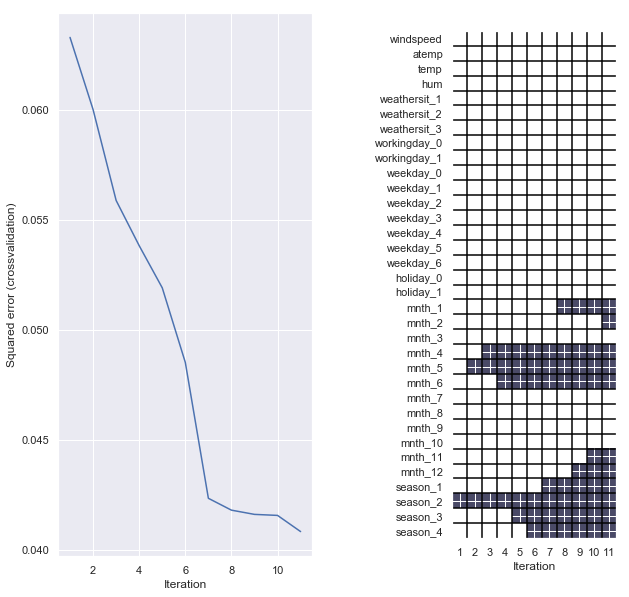

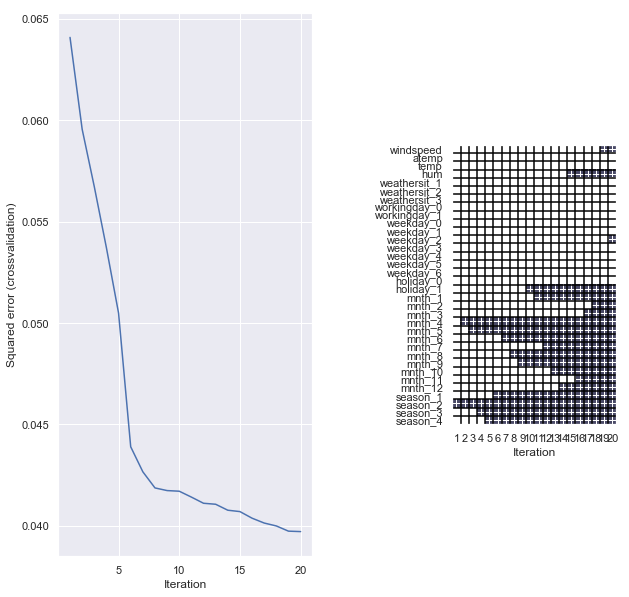

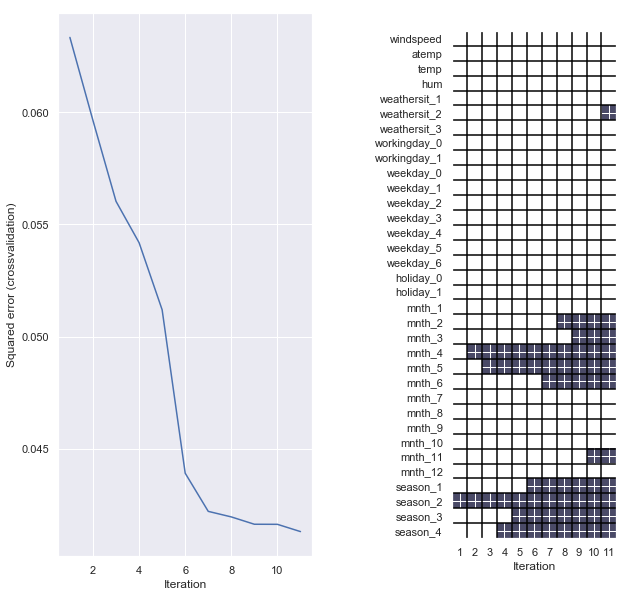

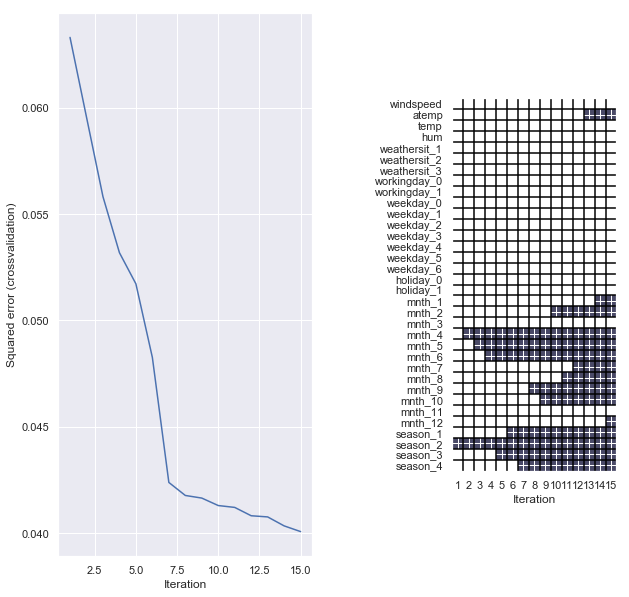

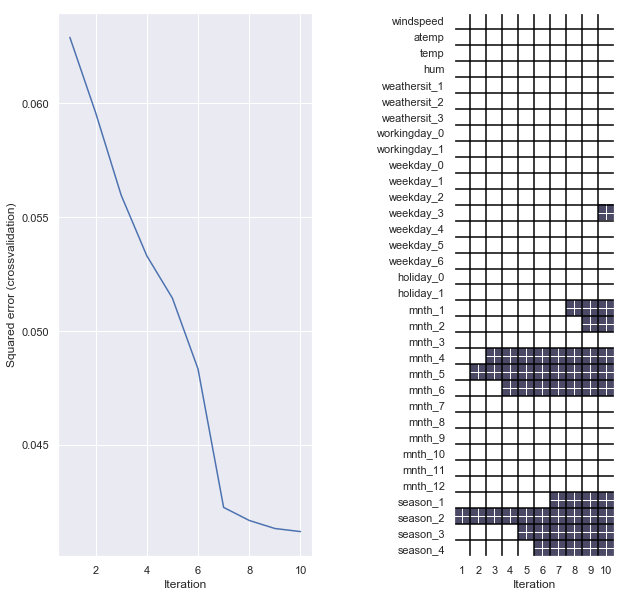

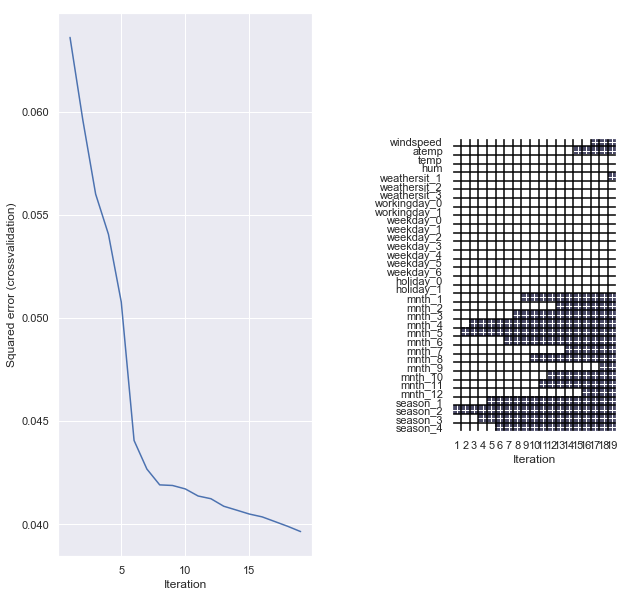

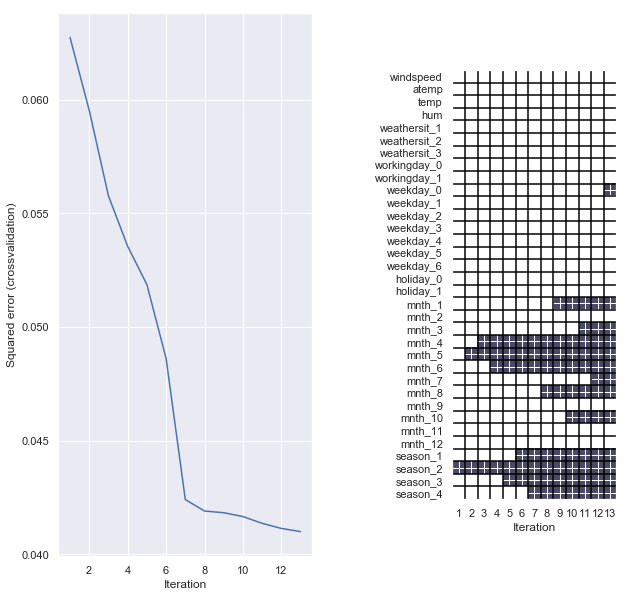

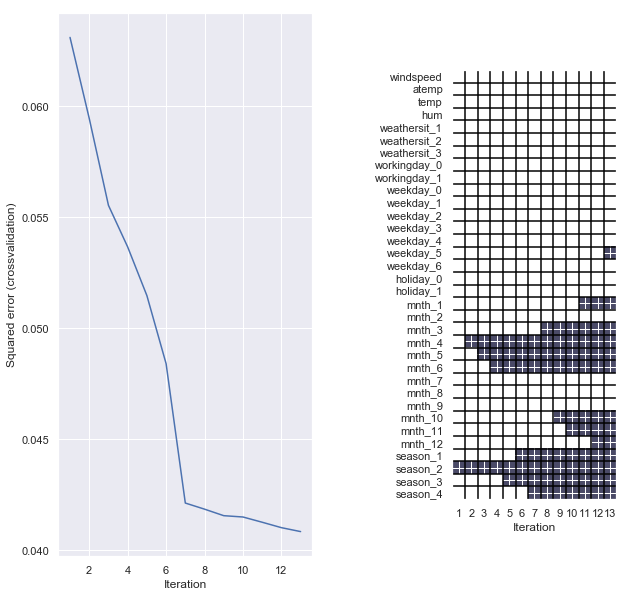

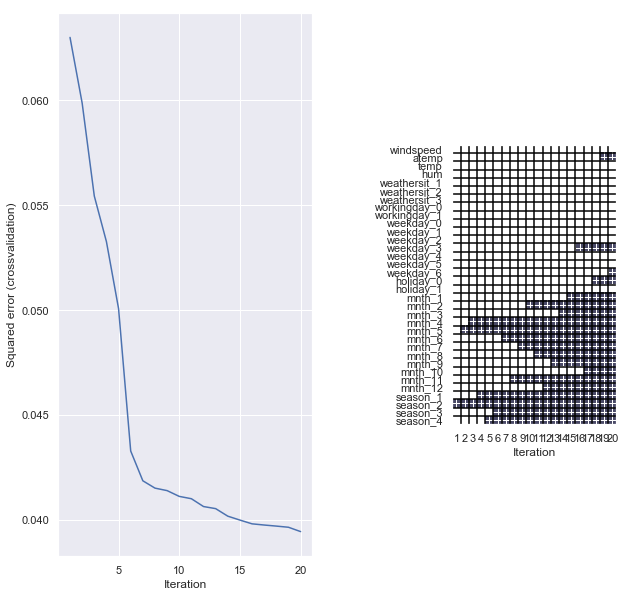

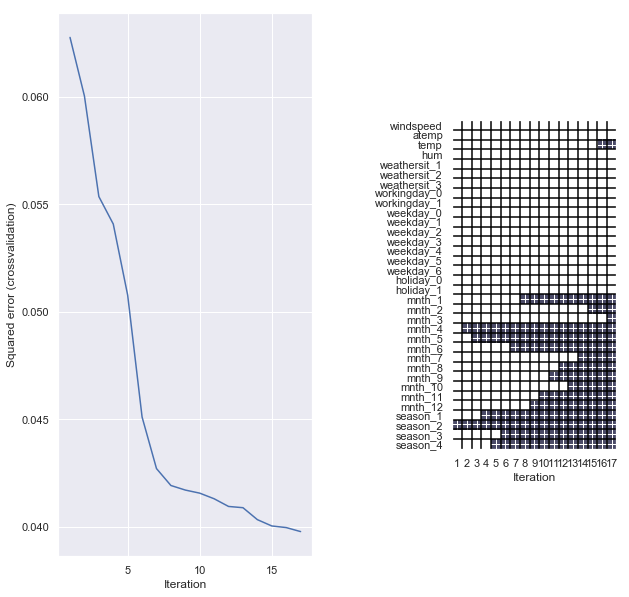

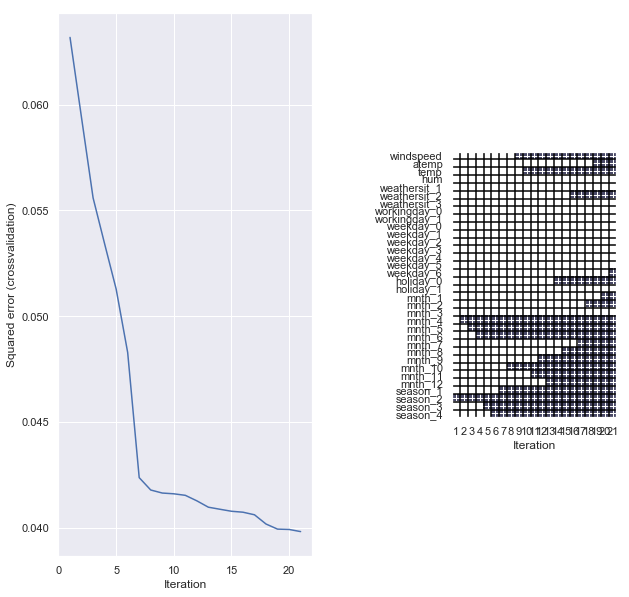

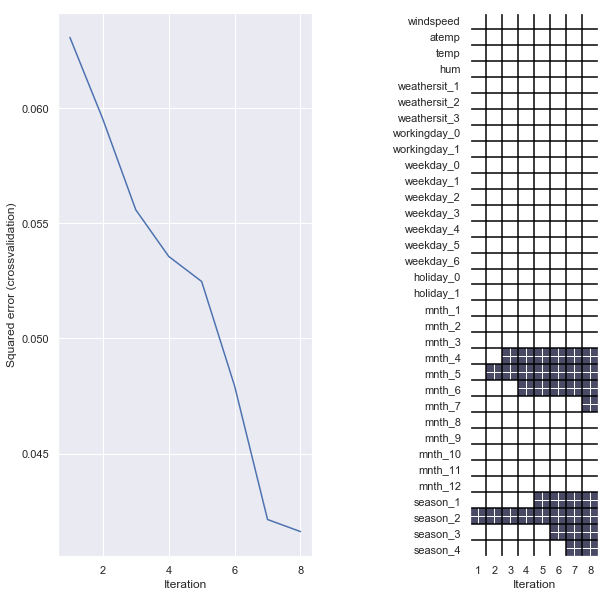

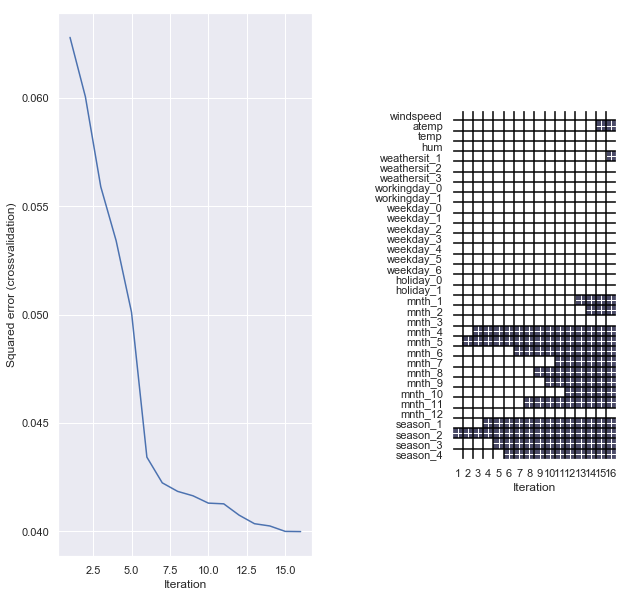

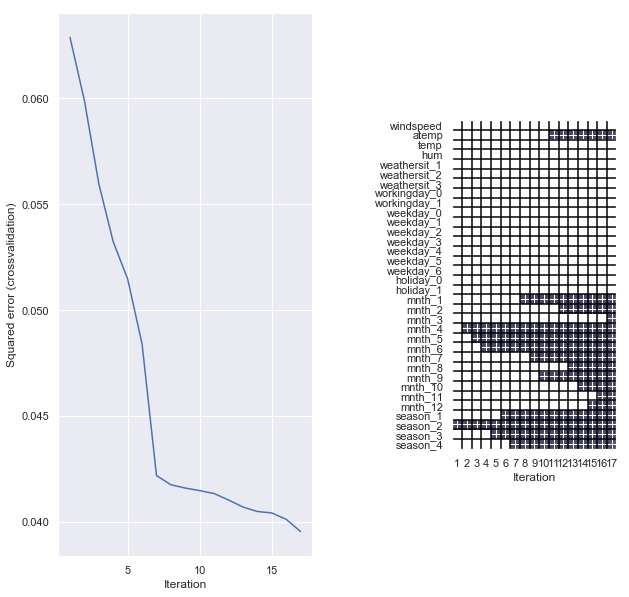

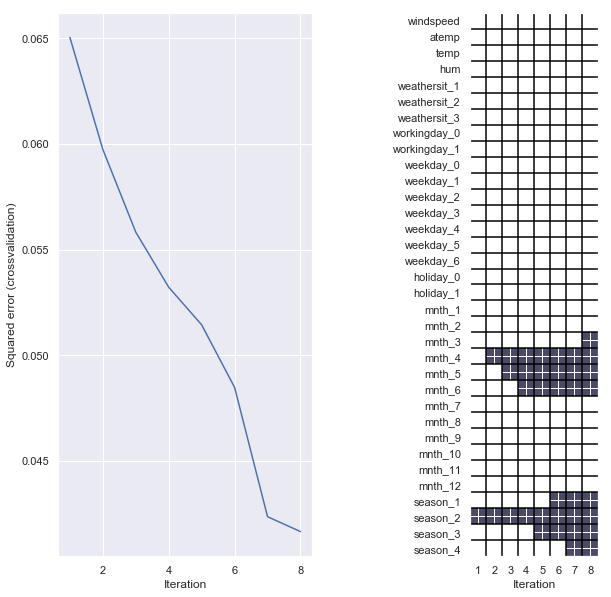

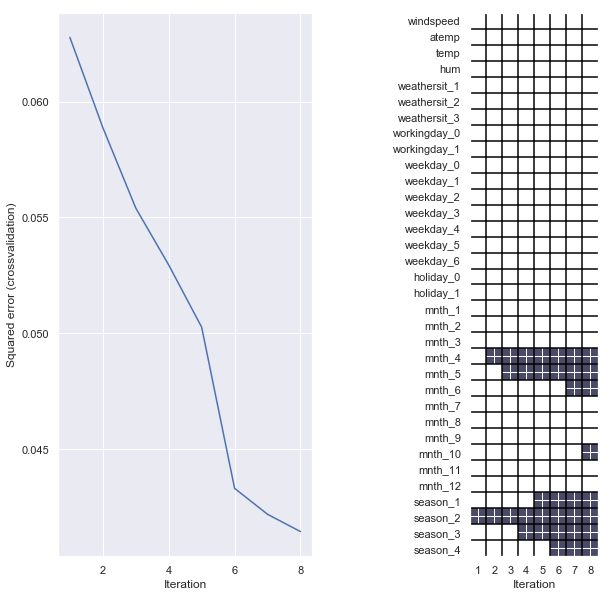

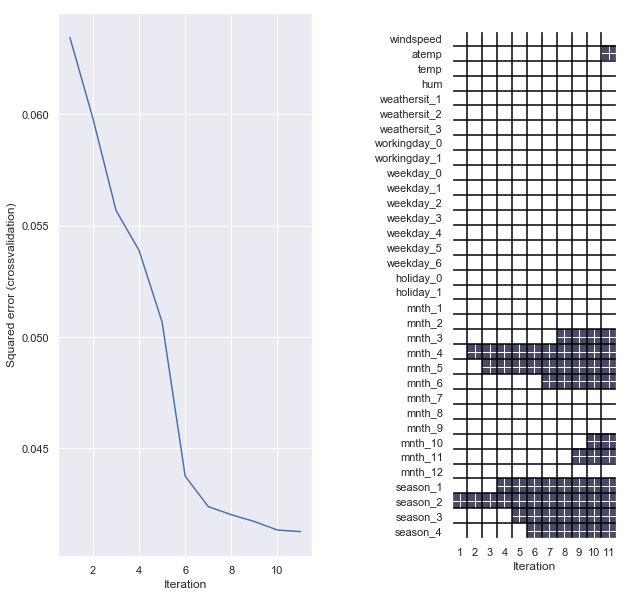

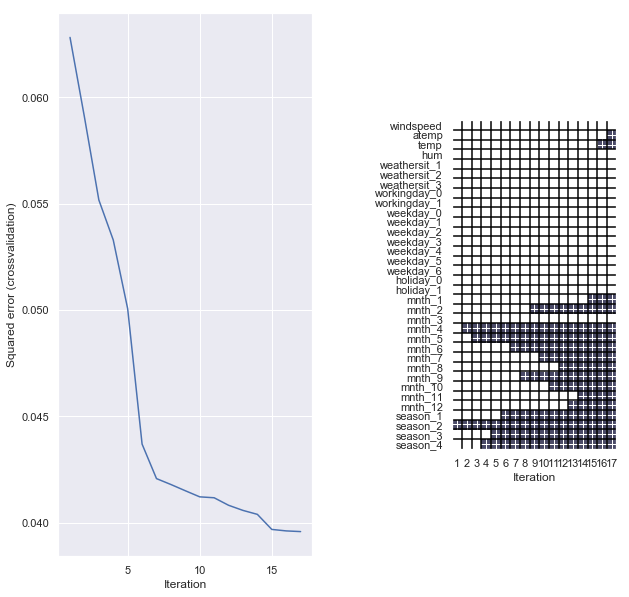

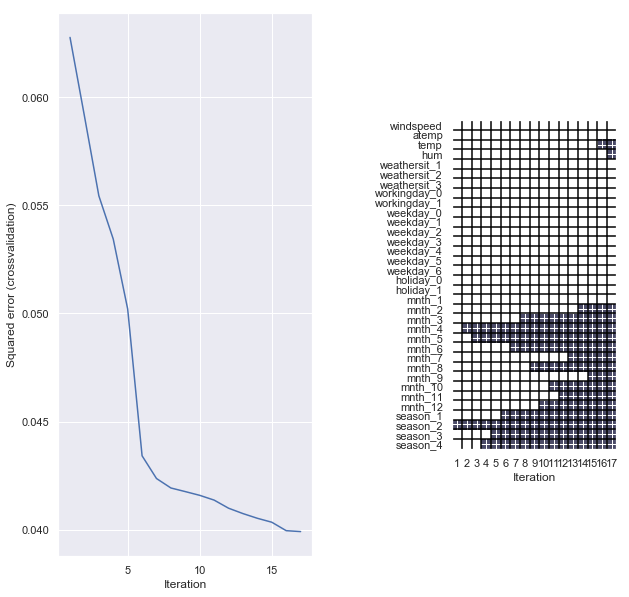

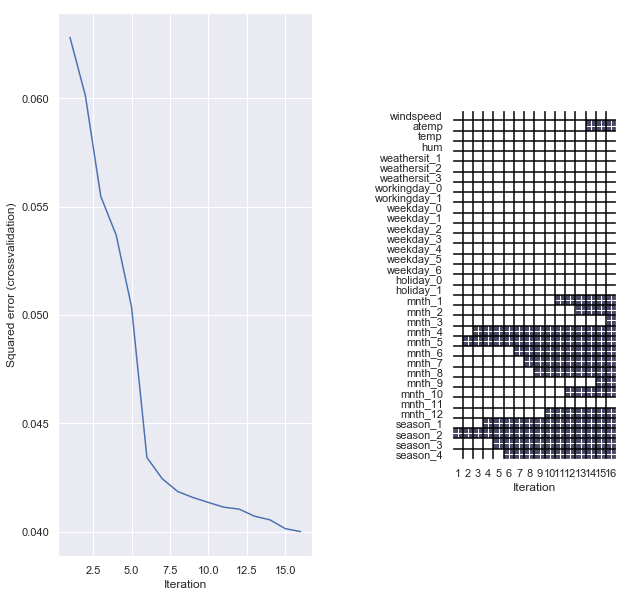

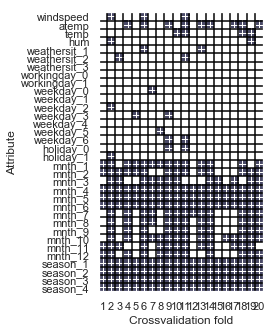

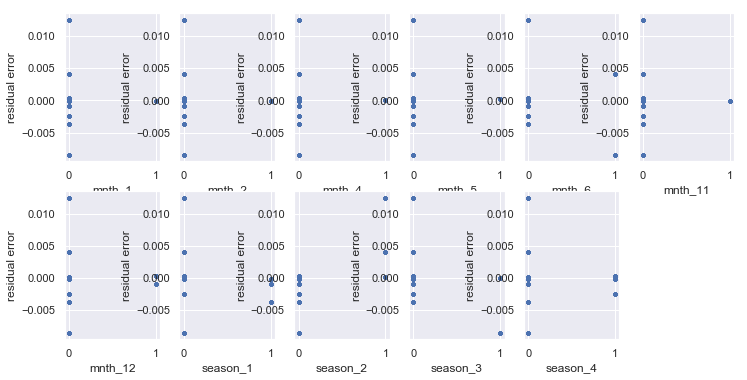

Ran Exercise 6.2.1


In [15]:
# exercise 6.2.1
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
from matplotlib.pyplot import figure, plot, subplot, title, xlabel, ylabel, show, clim, savefig
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
from Tools.toolbox_02450 import feature_selector_lr, bmplot
import numpy as np

# Load data from matlab file
mat_data = X

y = X[:,-3].squeeze()
attributeNames = [name for name in list(sub_df)]
N, M = X.shape


## Crossvalidation
# Create crossvalidation partition for evaluation
K = 20
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))

k=0
for train_index, test_index in CV.split(X):
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    internal_cross_validation = 4
    
    # Compute squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum()/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum()/y_test.shape[0]

    # Compute squared error with all features selected (no feature selection)
    m = lm.Ridge (fit_intercept=True, alpha = 0.5).fit(X_train, y_train)
#     m = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Compute squared error with feature subset selection
    #textout = 'verbose';
    textout = '';
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation, display=textout)
    
    Features[selected_features,k]=1
    # .. alternatively you could use module sklearn.feature_selection
    if len(selected_features) is 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        m = lm.Ridge (fit_intercept=True, alpha = 0.5).fit(X_train[:,selected_features], y_train)
#         m = lm.LinearRegression(fit_intercept=True).fit(X_train[:,selected_features], y_train)
        Error_train_fs[k] = np.square(y_train-m.predict(X_train[:,selected_features])).sum()/y_train.shape[0]
        Error_test_fs[k] = np.square(y_test-m.predict(X_test[:,selected_features])).sum()/y_test.shape[0]
    
        figure(k)
        subplot(1,2,1)
        plot(range(1,len(loss_record)), loss_record[1:])
        xlabel('Iteration')
        ylabel('Squared error (crossvalidation)')    
        
        subplot(1,3,3)
        bmplot(attributeNames, range(1,features_record.shape[1]), -features_record[:,1:])
        clim(-1.5,0)
        xlabel('Iteration')

    print('Cross validation fold {0}/{1}'.format(k+1,K))
#     print('Train indices: {0}'.format(train_index))
#     print('Test indices: {0}'.format(test_index))
    print('Features no: {0}\n'.format(selected_features.size))

    k+=1


# Display results
print('\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_fs.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test_fs.sum())/Error_test_nofeatures.sum()))

figure(k)
subplot(1,3,2)
bmplot(attributeNames, range(1,Features.shape[1]+1), -Features)
clim(-1.5,0)
xlabel('Crossvalidation fold')
ylabel('Attribute')


# Inspect selected feature coefficients effect on the entire dataset and
# plot the fitted model residual error as function of each attribute to
# inspect for systematic structure in the residual

f=1 # cross-validation fold to inspect
ff=Features[:,f-1].nonzero()[0]
if len(ff) is 0:
    print('\nNo features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
else:
    m = lm.Ridge (fit_intercept=True, alpha = 0.5).fit(X[:,ff], y)
#     m = lm.LinearRegression(fit_intercept=True).fit(X[:,ff], y)
    
    y_est= m.predict(X[:,ff])
    residual=y-y_est
    
    figure(k+1, figsize=(12,6))
    title('Residual error vs. Attributes for features selected in cross-validation fold {0}'.format(f))
    for i in range(0,len(ff)):
       subplot(2,np.ceil(len(ff)/2.0),i+1)
       plot(X[:,ff[i]],residual,'.')
       xlabel(attributeNames[ff[i]])
       ylabel('residual error')
    
savefig('Forward_selection.png')
show()

print('Ran Exercise 6.2.1')


Crossvalidation fold: 1/10
Training network 1/9...
Epoch: 5; Error: 226.62496720210964;
Epoch: 10; Error: 103.40727732050084;
The goal of learning is reached
Training network 2/9...
Epoch: 5; Error: 107.48549782299287;
The goal of learning is reached
Training network 3/9...
Epoch: 5; Error: 294.42578039215664;
Epoch: 10; Error: 97.51444760988718;
The goal of learning is reached
Training network 4/9...
The goal of learning is reached
Training network 5/9...
Epoch: 5; Error: 125.33642138363484;
The goal of learning is reached
Training network 6/9...
Epoch: 5; Error: 94.39746591524722;
The goal of learning is reached
Training network 7/9...
Epoch: 5; Error: 83.62314724217089;
The goal of learning is reached
Training network 8/9...
The goal of learning is reached
Training network 9/9...
Epoch: 5; Error: 58.97891267292323;
The goal of learning is reached
Best train error: 58.97891267292323...

Crossvalidation fold: 2/10
Training network 1/9...
Epoch: 5; Error: 177.25799202181344;
The goal 

The goal of learning is reached
Training network 9/9...
The goal of learning is reached
Best train error: 51.937432906098884...
Mean-square error: 0.17172855925886515


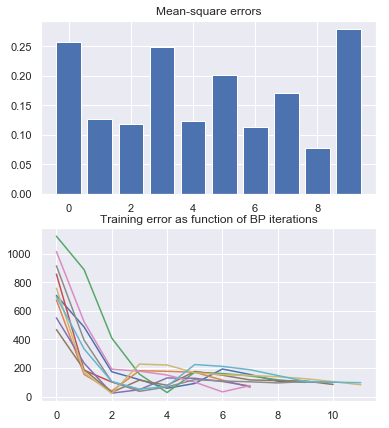

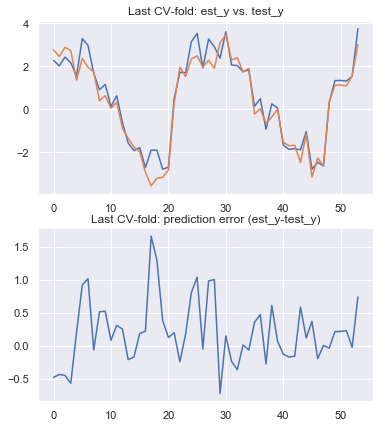

Ran Exercise 8.2.6


In [19]:
# exercise 8.2.6

from matplotlib.pyplot import figure, plot, subplot, title, show, bar
import numpy as np
from scipy.io import loadmat
import neurolab as nl
from sklearn import model_selection
from scipy import stats

# Load data from matlab file
mat_data = X

y = X[:,-3].squeeze()
attributeNames = [name for name in list(sub_df)]
N, M = X.shape
C = 2

# Normalize data
X = stats.zscore(X);
                
## Normalize and compute PCA (UNCOMMENT to experiment with PCA preprocessing)
Y = stats.zscore(X,0);
U,S,V = np.linalg.svd(Y,full_matrices=False)
V = V.T
##Components to be included as features
k_pca = 3
X = X @ V[:,0:k_pca]
N, M = X.shape


# Parameters for neural network classifier
n_hidden_units = np.arange(1,10,1)     # number of hidden units
n_train = len(n_hidden_units)             # number of networks trained in each k-fold
learning_goal = 100     # stop criterion 1 (train mse to be reached)
max_epochs = 64         # stop criterion 2 (max epochs in training)
show_error_freq = 5     # frequency of training status updates

# K-fold crossvalidation
K = 10                   # only three folds to speed up this example
CV = model_selection.KFold(K,shuffle=True)

# Variable for classification error
errors = np.zeros(K)*np.nan
error_hist = np.zeros((max_epochs,K))*np.nan
bestnet = list()
k=0
for train_index, test_index in CV.split(X,y):
    print('\nCrossvalidation fold: {0}/{1}'.format(k+1,K))    
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    
    best_train_error = np.inf
    for i in range(n_train):
        print('Training network {0}/{1}...'.format(i+1,n_train))
        # Create randomly initialized network with 2 layers
        ann = nl.net.newff([[-3, 3]]*M, [n_hidden_units[i], 1], [nl.trans.TanSig(),nl.trans.PureLin()])
        if i==0:
            bestnet.append(ann)
        # train network
        train_error = ann.train(X_train, y_train.reshape(-1,1), goal=learning_goal, epochs=max_epochs, show=show_error_freq)
        if train_error[-1]<best_train_error:
            bestnet[k]=ann
            best_train_error = train_error[-1]
            error_hist[range(len(train_error)),k] = train_error

    print('Best train error: {0}...'.format(best_train_error))
    y_est = bestnet[k].sim(X_test).squeeze()
    errors[k] = np.power(y_est-y_test,2).sum().astype(float)/y_test.shape[0]
    k+=1
    #break

# Print the average least squares error
print('Mean-square error: {0}'.format(np.mean(errors)))

figure(figsize=(6,7));
subplot(2,1,1); bar(range(0,K),errors); title('Mean-square errors');
subplot(2,1,2); plot(error_hist); title('Training error as function of BP iterations');
figure(figsize=(6,7));
subplot(2,1,1); plot(y_est); plot(y_test); title('Last CV-fold: est_y vs. test_y'); 
subplot(2,1,2); plot((y_est-y_test)); title('Last CV-fold: prediction error (est_y-test_y)'); 
show()

print('Ran Exercise 8.2.6')

#% The weights if the network can be extracted via
#bestnet[0].layers[0].np['w'] # Get the weights of the first layer
#bestnet[0].layers[0].np['b'] # Get the bias of the first layer


Computing CV fold: 1/20..
Computing CV fold: 2/20..
Computing CV fold: 3/20..
Computing CV fold: 4/20..
Computing CV fold: 5/20..
Computing CV fold: 6/20..
Computing CV fold: 7/20..
Computing CV fold: 8/20..
Computing CV fold: 9/20..
Computing CV fold: 10/20..
Computing CV fold: 11/20..
Computing CV fold: 12/20..
Computing CV fold: 13/20..
Computing CV fold: 14/20..
Computing CV fold: 15/20..
Computing CV fold: 16/20..
Computing CV fold: 17/20..
Computing CV fold: 18/20..
Computing CV fold: 19/20..
Computing CV fold: 20/20..


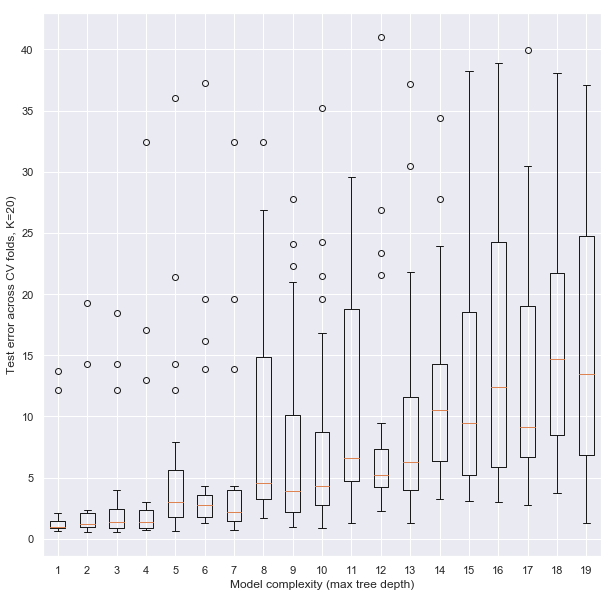

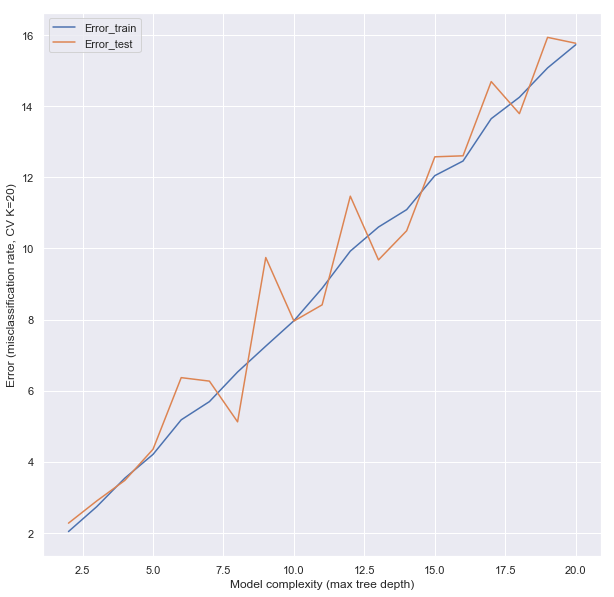

Ran Exercise 6.1.2


In [22]:
# exercise 6.1.2
from sklearn import preprocessing
from sklearn import utils
from matplotlib.pyplot import figure, plot, xlabel, ylabel, legend, show, boxplot
from scipy.io import loadmat
from sklearn import model_selection, tree
import numpy as np

# Load Matlab data file and extract variables of interest
mat_data = X

y = X[:,-3].squeeze()
attributeNames = [name for name in list(sub_df)]
N, M = X.shape
C = 2

# Tree complexity parameter - constraint on maximum depth
tc = np.arange(2, 21, 1)

# K-fold crossvalidation
K = 20
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initialize variable
Error_train = np.empty((len(tc),K))
Error_test = np.empty((len(tc),K))

k=0
for train_index, test_index in CV.split(X):
    print('Computing CV fold: {0}/{1}..'.format(k+1,K))

    # extract training and test set for current CV fold
    X_train, y_train = X[train_index,:], y[train_index]
    X_test, y_test = X[test_index,:], y[test_index]

    for i, t in enumerate(tc):
        # Fit decision tree classifier, Gini split criterion, different pruning levels
        dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=t)
        lab_enc = preprocessing.LabelEncoder()
        encoded = lab_enc.fit_transform(y_train.ravel())
        dtc = dtc.fit(X_train,encoded)
        y_est_test = dtc.predict(X_test)
        y_est_train = dtc.predict(X_train)
        # Evaluate misclassification rate over train/test data (in this CV fold)
        misclass_rate_test = sum(np.abs(y_est_test - y_test)) / float(len(y_est_test))
        misclass_rate_train = sum(np.abs(y_est_train - y_train)) / float(len(y_est_train))
        Error_test[i,k], Error_train[i,k] = misclass_rate_test, misclass_rate_train
    k+=1

    
f = figure()
boxplot(Error_test.T)
xlabel('Model complexity (max tree depth)')
ylabel('Test error across CV folds, K={0})'.format(K))

f = figure()
plot(tc, Error_train.mean(1))
plot(tc, Error_test.mean(1))
xlabel('Model complexity (max tree depth)')
ylabel('Error (misclassification rate, CV K={0})'.format(K))
legend(['Error_train','Error_test'])
    
show()

print('Ran Exercise 6.1.2')

Computing CV fold: 1/10..
Computing CV fold: 2/10..
Computing CV fold: 3/10..
Computing CV fold: 4/10..
Computing CV fold: 5/10..
Computing CV fold: 6/10..
Computing CV fold: 7/10..
Computing CV fold: 8/10..
Computing CV fold: 9/10..
Computing CV fold: 10/10..


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


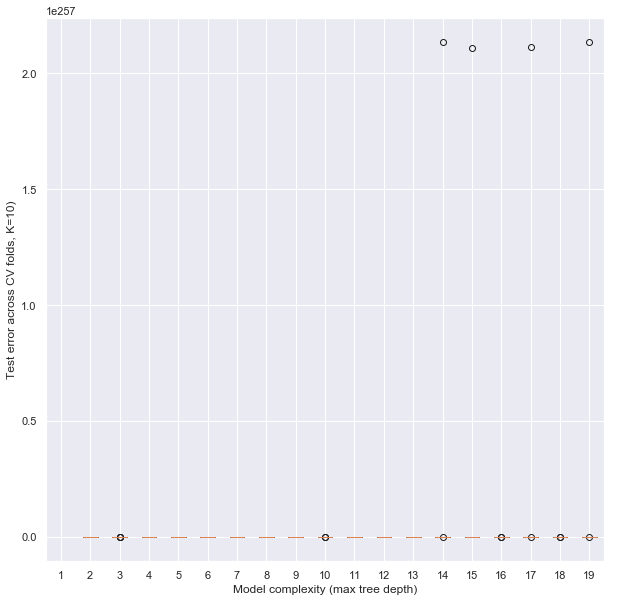

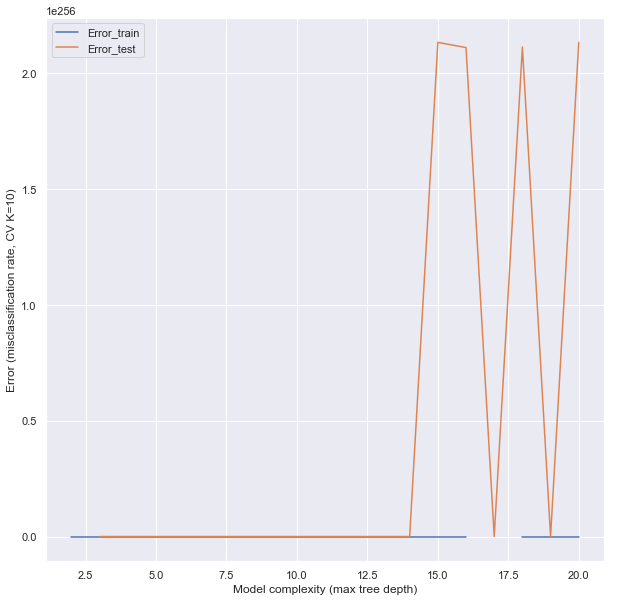

Ran Exercise 6.1.2


In [28]:
# exercise 6.3.1

from matplotlib.pyplot import figure, boxplot, xlabel, ylabel, show
import numpy as np
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection, tree
from scipy import stats

# Load Matlab data file and extract variables of interest
mat_data = X

y = X[:,-3].squeeze()
attributeNames = [name for name in list(sub_df)]
N, M = X.shape
C = 2

# Tree complexity parameter - constraint on maximum depth
tc = np.arange(2, 21, 1)

# K-fold crossvalidation
K = 10
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initialize variable
Error_train = np.empty((len(tc),K))
Error_test = np.empty((len(tc),K))

k=0
for train_index, test_index in CV.split(X):
    print('Computing CV fold: {0}/{1}..'.format(k+1,K))

    # extract training and test set for current CV fold
    X_train, y_train = X[train_index,:], y[train_index]
    X_test, y_test = X[test_index,:], y[test_index]

    for i, t in enumerate(tc):
        # Fit decision tree classifier, Gini split criterion, different pruning levels
        dtc = lm.logistic.LogisticRegression(C=N)
        lab_enc = preprocessing.LabelEncoder()
        encoded = lab_enc.fit_transform(y_train.ravel())
        dtc = dtc.fit(X_train,encoded)
        y_logreg = model.predict(X_test)
        # Evaluate misclassification rate over train/test data (in this CV fold)
        Error_logreg[k] = 100*(y_logreg!=y_test).sum().astype(float)/len(y_test)
    k+=1

    
f = figure()
boxplot(Error_test.T)
xlabel('Model complexity (max tree depth)')
ylabel('Test error across CV folds, K={0})'.format(K))

f = figure()
plot(tc, Error_train.mean(1))
plot(tc, Error_test.mean(1))
xlabel('Model complexity (max tree depth)')
ylabel('Error (misclassification rate, CV K={0})'.format(K))
legend(['Error_train','Error_test'])
    
show()

print('Ran Exercise 6.1.2')


# ## Crossvalidation
# # Create crossvalidation partition for evaluation
# K = 10
# CV = model_selection.KFold(n_splits=K,shuffle=True)
# #CV = model_selection.StratifiedKFold(n_splits=K)

# # Initialize variables
# Error_logreg = np.empty((K,1))
# Error_dectree = np.empty((K,1))
# n_tested=0

# k=0
# lab_enc = preprocessing.LabelEncoder()
# for train_index, test_index in CV.split(X,y):
#     print('CV-fold {0} of {1}'.format(k+1,K))
    
#     # extract training and test set for current CV fold
#     X_train = X[train_index,:]
#     y_train = y[train_index]
#     X_test = X[test_index,:]
#     y_test = y[test_index]

#     # Fit and evaluate Logistic Regression classifier
#     model = lm.logistic.LogisticRegression(C=N)
#     encoded1 = lab_enc.fit_transform(y_train)
#     model = model.fit(X_train, encoded1)
#     y_logreg = model.predict(X_test)
#     Error_logreg[k] = 100*(y_logreg!=y_test).sum().astype(float)/len(y_test)
    
#     # Fit and evaluate Decision Tree classifier
#     model2 = tree.DecisionTreeClassifier()
#     encoded2 = lab_enc.fit_transform(y_train)
#     model2 = model2.fit(X_train, encoded2)
#     y_dectree = model2.predict(X_test)
#     Error_dectree[k] = 100*(y_dectree!=y_test).sum().astype(float)/len(y_test)

#     k+=1

# # Test if classifiers are significantly different using methods in section 9.3.3
# # by computing credibility interval. Notice this can also be accomplished by computing the p-value using
# # [tstatistic, pvalue] = stats.ttest_ind(Error_logreg,Error_dectree)
# # and test if the p-value is less than alpha=0.05. 
# z = (Error_logreg-Error_dectree)
# zb = z.mean()
# nu = K-1
# sig =  (z-zb).std()  / np.sqrt(K-1)
# alpha = 0.05

# zL = zb + sig * stats.t.ppf(alpha/2, nu);
# zH = zb + sig * stats.t.ppf(1-alpha/2, nu);

# if zL <= 0 and zH >= 0 :
#     print('Classifiers are not significantly different')        
# else:
#     print('Classifiers are significantly different.')
    
# # Boxplot to compare classifier error distributions
# figure()
# boxplot(np.concatenate((Error_logreg, Error_dectree),axis=1))
# xlabel('Logistic Regression   vs.   Decision Tree')
# ylabel('Cross-validation error [%]')

# show()

# print('Ran Exercise 6.3.1')